In [6]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]

In [7]:
from scipy import stats
import numpy as np

# Generate two sets of fitness values with different sizes (for demonstration purposes)
fitness_values_1 = np.random.normal(loc=10, scale=2, size=100)  # Sample 1 with 100 values
fitness_values_2 = np.random.normal(loc=10, scale=2, size=150)  # Sample 2 with 150 values

# Perform t-test
t_statistic, p_value = stats.ttest_ind(fitness_values_1, fitness_values_2)

# Check the p-value to determine significance
alpha = 0.05  # Set your desired significance level (commonly 0.05)
if p_value < alpha:
    print("The distributions are significantly different (reject the null hypothesis)")
else:
    print("The distributions are not significantly different (fail to reject the null hypothesis)")

# Optionally, print t-statistic and p-value
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")


The distributions are not significantly different (fail to reject the null hypothesis)
t-statistic: 0.1811
p-value: 0.8564


In [3]:
from scipy import stats
import numpy as np
data_folder = r"E:\data\gst-0815-23\Pre-Test\Compare_Landscape_cache"
first_cache_file = data_folder + r"\first_cache_alpha_0.1"
with open(first_cache_file, 'rb') as infile:
    fitness_values_1 = pickle.load(infile)
second_cache_file = data_folder + r"\second_local_peak_across_K_alpha_0.1"  # file name typo
with open(second_cache_file, 'rb') as infile:
    fitness_values_2 = pickle.load(infile)
print(len(fitness_values_1[0]))
print(len(fitness_values_2[0]))


51200
26214400


In [ ]:
# Perform t-test
t_statistic, p_value = stats.ttest_ind(fitness_values_1[0], fitness_values_2[0])

# Check the p-value to determine significance
alpha = 0.05  # Set your desired significance level (commonly 0.05)
if p_value < alpha:
    print("The distributions are significantly different (reject the null hypothesis)")
else:
    print("The distributions are not significantly different (fail to reject the null hypothesis)")

# Optionally, print t-statistic and p-value
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

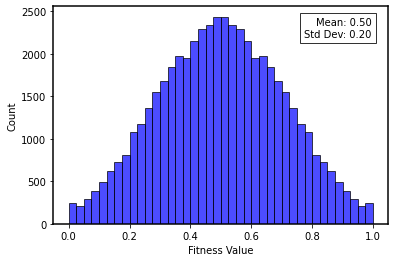

In [5]:
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.hist(fitness_values_1[0], bins=40, facecolor="blue", edgecolor="black", alpha=0.7)
# plt.title("First Cache N{0}_K{1}_alpha_{2}.png".format(N, K, alpha))
# Calculate mean and standard deviation using NumPy
mean_fitness = np.mean(fitness_values_1[0])
std_dev_fitness = np.std(fitness_values_1[0])
# Annotate the plot with mean and standard deviation information
plt.text(0.95, 0.95, f"Mean: {mean_fitness:.2f}\nStd Dev: {std_dev_fitness:.2f}",
         horizontalalignment='right', verticalalignment='top', transform=ax.transAxes,
         bbox=dict(facecolor='white', alpha=0.8))
plt.xlabel("Fitness Value")
plt.ylabel("Count")
plt.show()

In [33]:
# T-test
data_folder = r"E:\data\gst-0815-23\Pre-Test\Compare_Landscape_cache_6"
alpha_list = [1, 2, 3]
p_value_list = []
mean_diff_list = []
for alpha in alpha_list:
    p_value_file = data_folder + r"\p_value_across_K_alpha_{0}".format(alpha)
    mean_diff_file = data_folder + r"\mean_diff_across_K_alpha_{0}".format(alpha)

    with open(p_value_file, 'rb') as infile:
        p_value = pickle.load(infile)
    with open(mean_diff_file, 'rb') as infile:
        mean_diff = pickle.load(infile)
    p_value_list.extend(p_value)
    mean_diff_list.extend(mean_diff)
print(np.array(p_value_list).shape)
print(np.array(mean_diff_list).shape)

# print(p_value_list)

(10, 9)
(10, 9)


(10, 9)


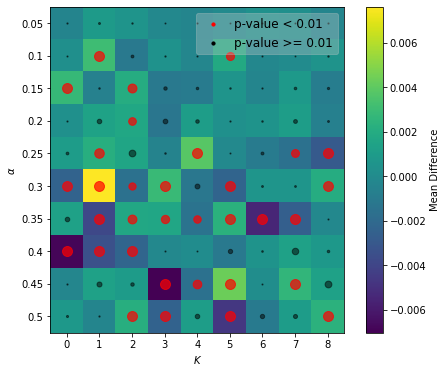

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your actual data)
# Creating random data for illustration purposes
# Replace this with your actual data
K_list = [0, 1, 2, 3, 4, 5, 6, 7, 8]
alpha_list = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]
X_values = alpha_list  # Replace with your X values
Y_values = K_list  # Replace with your Y values

mean_diff_matrix = np.array(mean_diff_list)
p_value_matrix = np.array(p_value_list)
# Setting the threshold for p-value
p_value_threshold = 0.01

# Creating the heatmap
plt.figure(figsize=(8, 6))

# Plotting the heatmap with mean differences as color intensity and p-values as marker size
plt.imshow(mean_diff_matrix, cmap='viridis', interpolation='nearest', vmin=mean_diff_matrix.min(), vmax=mean_diff_matrix.max())
# Adding color bar for mean differences
plt.colorbar(label='Mean Difference')

print(p_value_matrix.shape)
# Adding markers for p-values as marker size with different sizes based on the threshold (inverted relationship)
for i in range(len(X_values)):
    for j in range(len(Y_values)):
        marker_size = 1 / (p_value_matrix[i, j] + 0.01)  # Invert relationship for marker size
        if p_value_matrix[i, j] < p_value_threshold:
            plt.scatter(j, i, s=marker_size, c='red', marker='o', alpha=0.7)
        else:
            plt.scatter(j, i, s=marker_size, c='black', marker='o', alpha=0.5)


# Setting X and Y axis labels
plt.xticks(np.arange(len(Y_values)), Y_values)
plt.yticks(np.arange(len(X_values)), X_values)
plt.xlabel('$K$')
plt.ylabel('$\\alpha$')

# Adding legend or description for marker color based on threshold
plt.scatter([], [], s=100*0.1, c='red', marker='o', label='p-value < 0.01')
plt.scatter([], [], s=100*0.1, c='black', marker='o', label='p-value >= 0.01')
# plt.legend(title='P-value Color', labelspacing=1.2, loc='upper right')
legend = plt.legend(frameon=True, ncol=1, fontsize=12, loc='upper right')
legend.get_frame().set_facecolor('lightgrey')  # Set legend background color
legend.get_frame().set_alpha(0.3)  # Set legend transparency
# Adding title and displaying the plot
# plt.title('T-test Between Fine and Coarse Landscape Fitness Values')
plt.savefig(data_folder + r"\t_test.png", transparent=True, dpi=300)
plt.show()
